In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DDWZurnDTIYZsu3j5iZ8")
project = rf.workspace("isep-efaed").project("check_metallic")
version = project.version(1)
dataset = version.download("yolov11")
                
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CHECK_METALLIC-1 in yolov11:: 100%|██████████| 15012/15012 [00:02<00:00, 7410.95it/s]


In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.51 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.6/8062.4 GB disk)


**changes paths of data in file.yaml**

In [3]:
text="""
train: /kaggle/working/CHECK_METALLIC-1/train/images
val: /kaggle/working/CHECK_METALLIC-1/valid/images
test: /kaggle/working/CHECK_METALLIC-1/test/images

nc: 100
names: ['HEA100', 'HEA100R', 'HEA120', 'HEA120R', 'HEA140', 'HEA140R', 'HEA160', 'HEA160R', 'HEA180', 'HEA180R', 'HEA200', 'HEA200R', 'HEA220', 'HEA220R', 'HEA240', 'HEA240R', 'HEA260', 'HEA260R', 'HEA280', 'HEA280R', 'HEA300', 'HEA300R', 'HEA320', 'HEA320R', 'HEA340', 'HEA340R', 'HEA360', 'HEA360R', 'HEA400', 'HEA400R', 'HEA450', 'HEA450R', 'HEA500', 'HEA500R', 'HEB100', 'HEB100R', 'HEB120', 'HEB120R', 'HEB140', 'HEB140R', 'HEB160', 'HEB160R', 'HEB180', 'HEB180R', 'HEB200', 'HEB200R', 'HEB220', 'HEB220R', 'HEB240', 'HEB240R', 'HEB260', 'HEB260R', 'HEB280', 'HEB280R', 'HEB300', 'HEB300R', 'HEB320', 'HEB320R', 'HEB340', 'HEB340R', 'HEB360', 'HEB360R', 'HEB400', 'HEB400R', 'HEB450', 'HEB450R', 'HEB500', 'HEB500R', 'IPE100', 'IPE100R', 'IPE120', 'IPE120R', 'IPE140', 'IPE140R', 'IPE160', 'IPE160R', 'IPE180', 'IPE180R', 'IPE200', 'IPE200R', 'IPE220', 'IPE220R', 'IPE240', 'IPE240R', 'IPE270', 'IPE270R', 'IPE300', 'IPE300R', 'IPE330', 'IPE330R', 'IPE360', 'IPE360R', 'IPE400', 'IPE400R', 'IPE450', 'IPE450R', 'IPE500', 'IPE500R', 'IPE80', 'IPE80R']

roboflow:
  workspace: isep-efaed
  project: check_metallic
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/isep-efaed/check_metallic/dataset/1
  """

In [4]:
def text2file(text,filepath):
    with open(filepath,'w')as file:
        file.write(text)
        
text2file(text,'output.yaml')        

**upload weights of yolo11n**

In [5]:
from ultralytics import YOLO
Model = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.6MB/s]

Transferred 499/561 items from pretrained weights


In [6]:
!yolo task= segment mode=train data=/kaggle/working/output.yaml model=/kaggle/working/yolo11n.pt epochs=100 imgsz=640

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.51 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolo11n.pt, data=/kaggle/working/output.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classe

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     80/100      3.08G     0.2512     0.6318     0.8258          1        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1500       1350      0.939      0.964      0.984      0.975

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     81/100      3.09G     0.2514     0.6151     0.8242          5        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1500       1350      0.942      0.966      0.984      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     82/100      3.09G     0.2495     0.6072     0.8234          4        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1500       1350      0.948      0.959      0.985      0.977

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     83/10

In [7]:
!yolo task=segment mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 source=/kaggle/working/CHECK_METALLIC-1/test/images

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.51 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,647,588 parameters, 0 gradients, 6.6 GFLOPs

image 1/750 /kaggle/working/CHECK_METALLIC-1/test/images/0_Member_4_Cut_60_HEB-100_-15_jpg.rf.e7260df831ab8cf0a22095fd4338dcda.jpg: 640x640 1 HEA100, 1 HEB100, 9.9ms
image 2/750 /kaggle/working/CHECK_METALLIC-1/test/images/0_Rotated_13_Cut_60_HEB-100_15_jpg.rf.5cd44654fcc95a650d0294b9b034e1c3.jpg: 640x640 1 HEB100R, 9.4ms
image 3/750 /kaggle/working/CHECK_METALLIC-1/test/images/0_Rotated_4_Cut_40_HEB-100_-15_jpg.rf.02ea43adec6d769e9faa65bde5b57307.jpg: 640x640 1 HEA100R, 1 HEB100R, 10.1ms
image 4/750 /kaggle/working/CHECK_METALLIC-1/test/images/0_Rotated_7_Cut_40_HEB-100_-10_jpg.rf.0eb21705d6861b97db208e5e96ab569f.jpg: 640x640 1 HEA100R, 9.7ms
image 5/750 /kaggle/working/CHECK_M

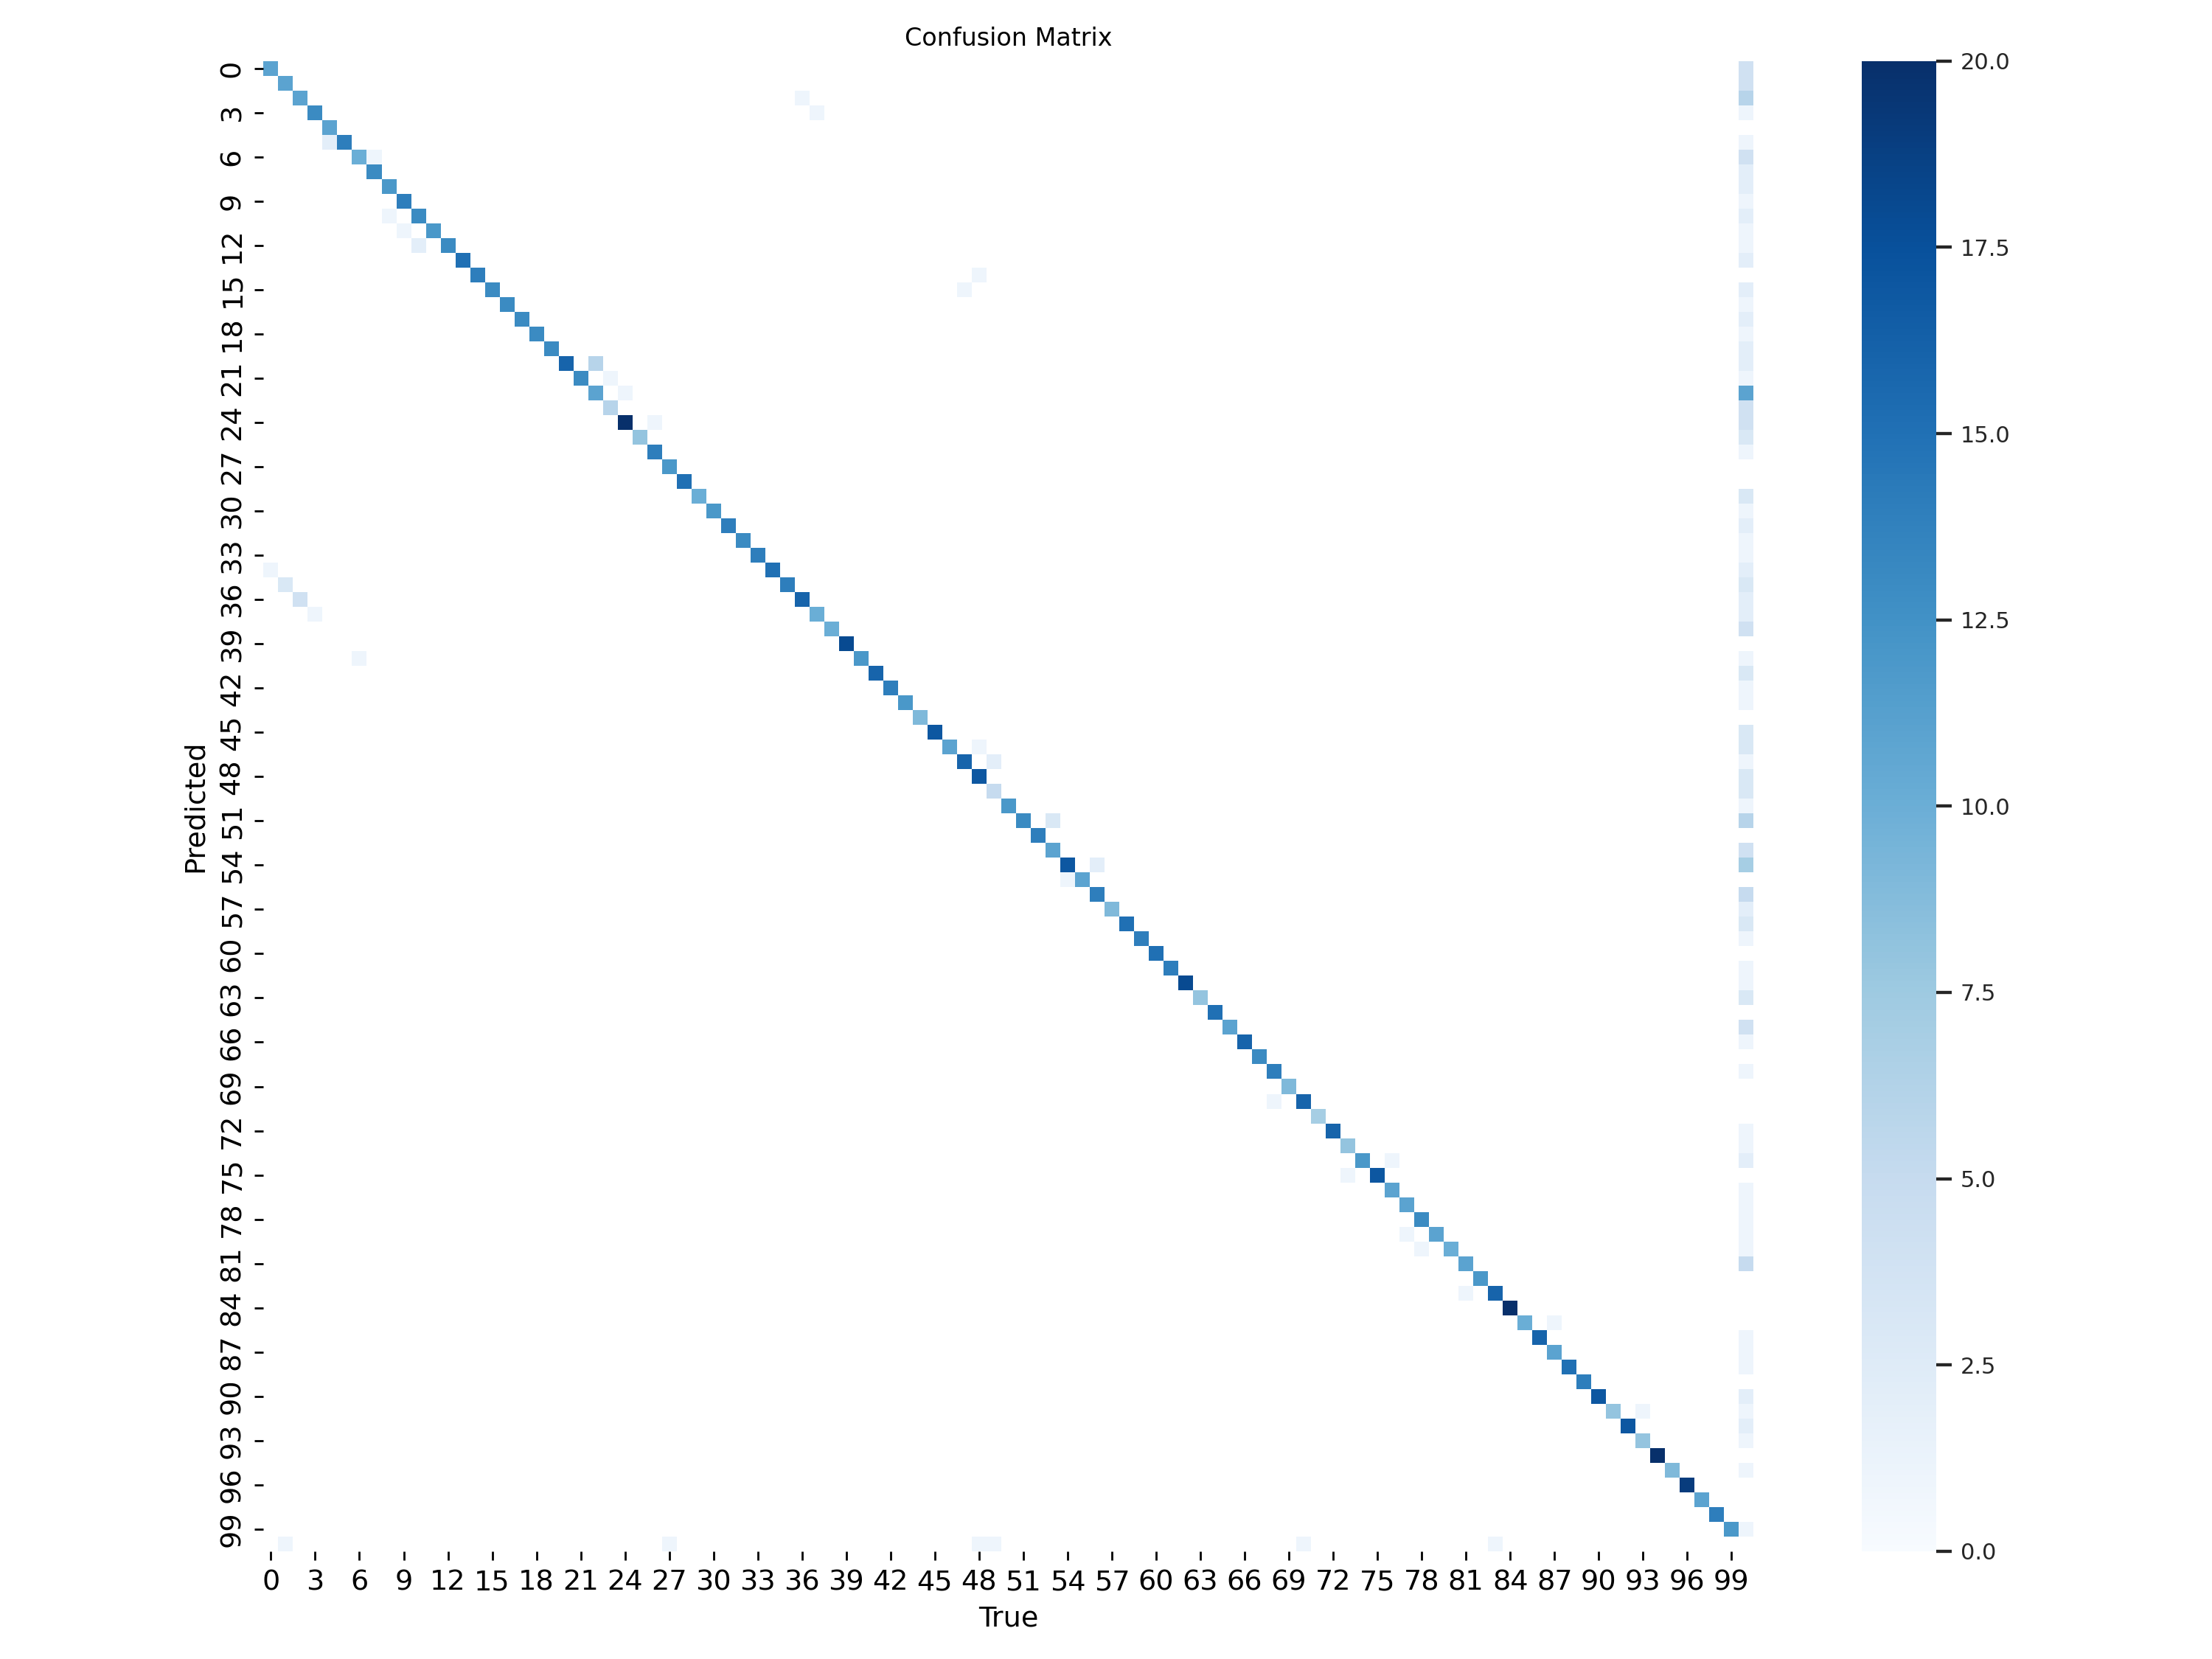

In [8]:
import glob
from IPython.display import Image, display


display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png"))

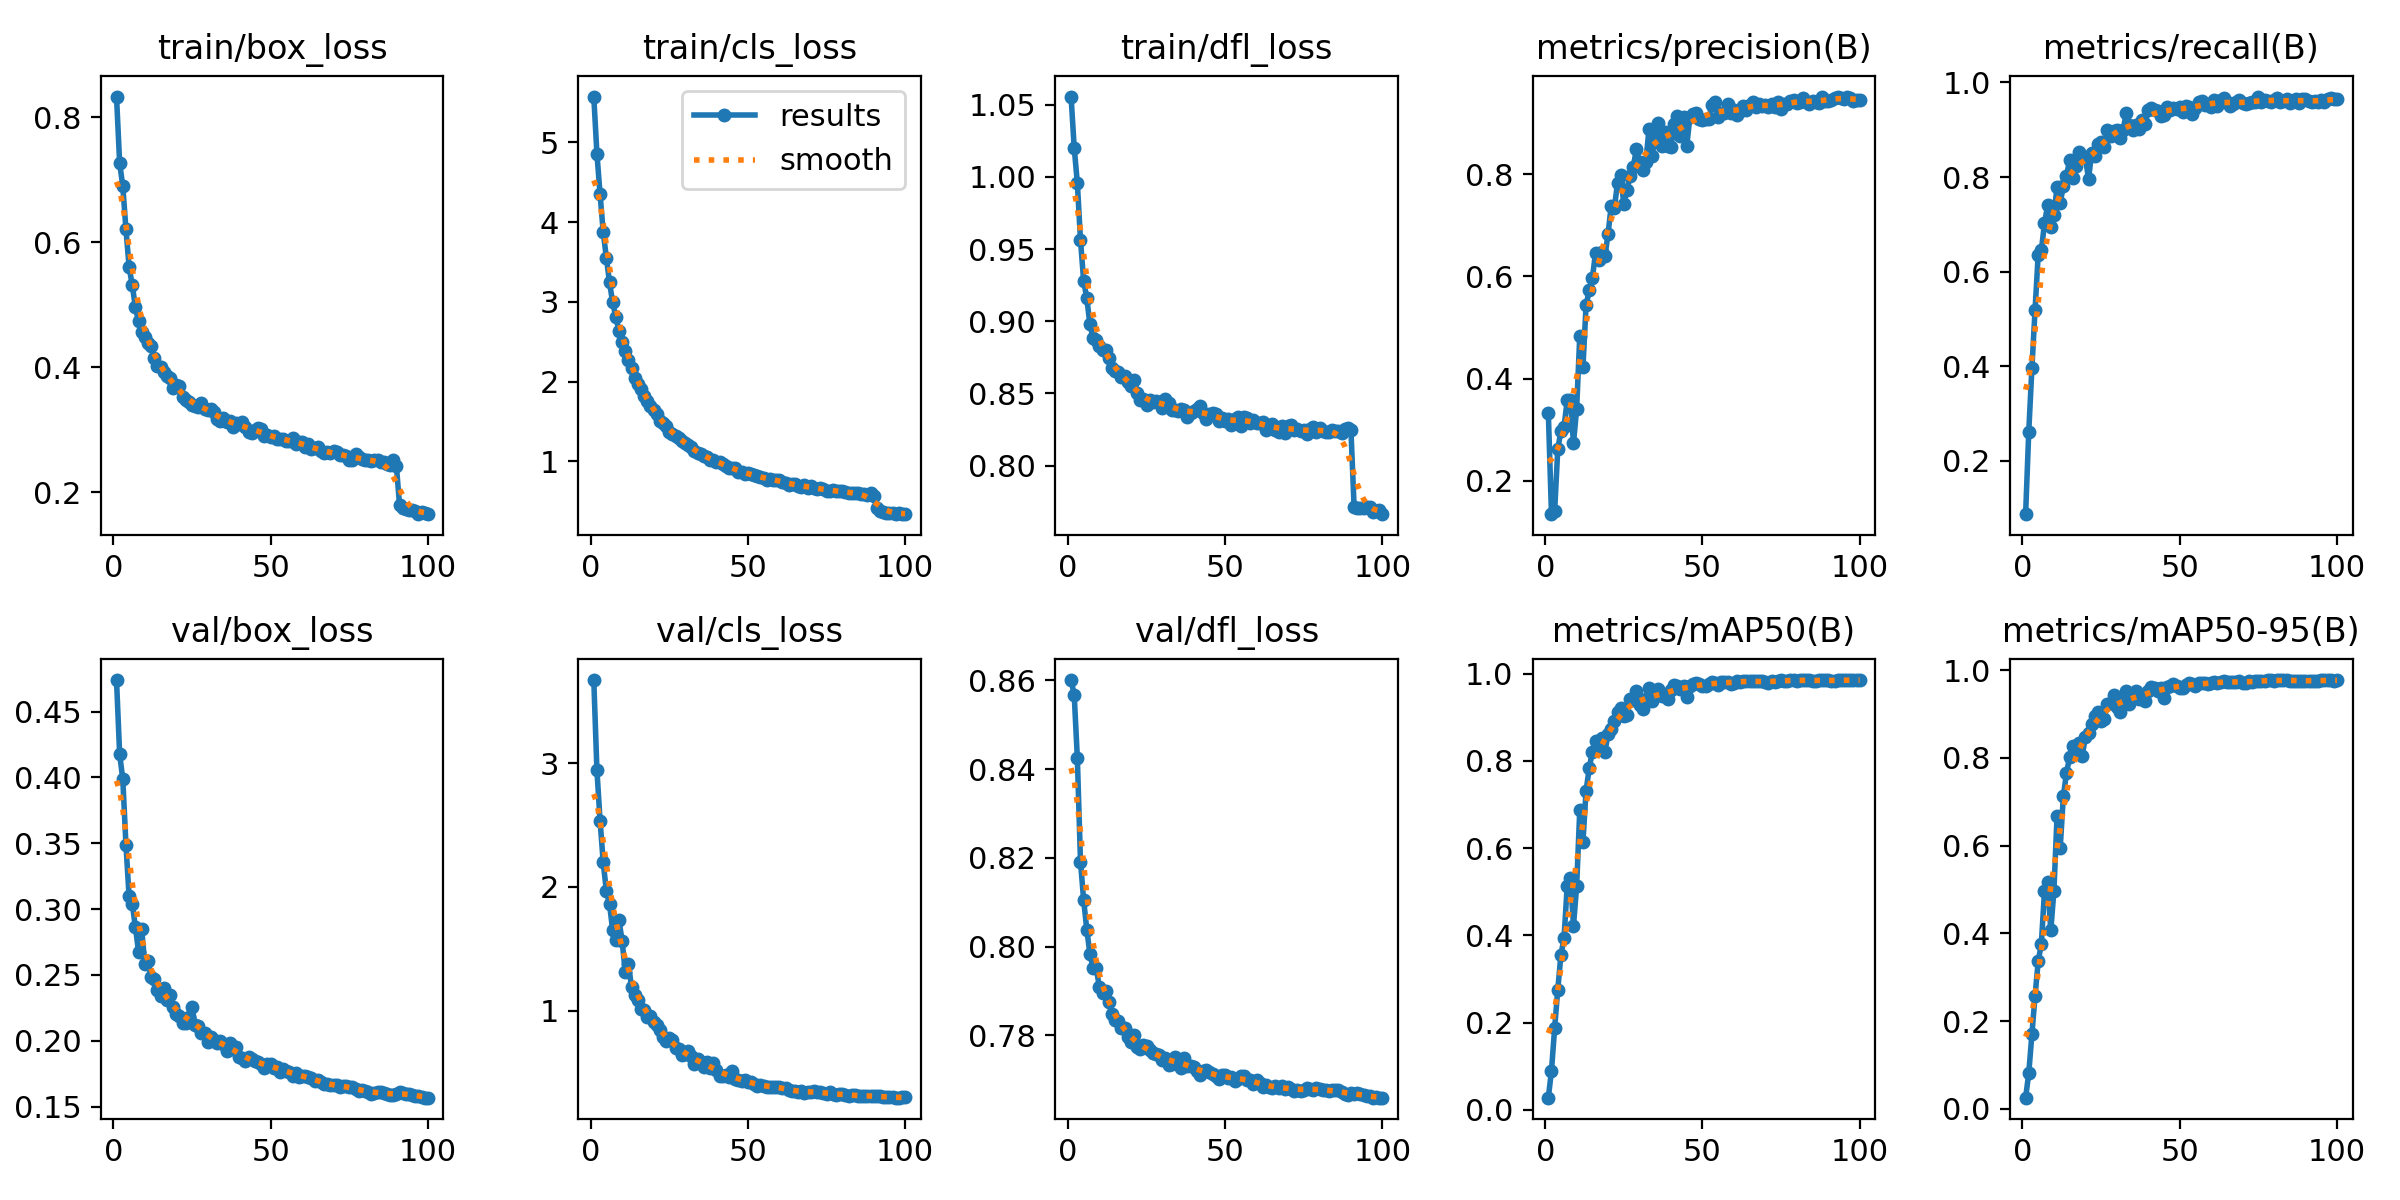

In [11]:
display(Image(filename=f"/kaggle/working/runs/detect/train/results.png"))